In [ ]:
!wget --no-check-certificate \
    https://github.com/AriesRmd/Temu-Kembali-Citra/blob/master/file_images.zip \
    -O /content/file_images.zip

--2021-11-02 09:12:46--  https://github.com/AriesRmd/Temu-Kembali-Citra/blob/master/file_images.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/file_images.zip’

/content/file_image     [ <=>                ] 131.98K  --.-KB/s    in 0.02s   

2021-11-02 09:12:47 (5.69 MB/s) - ‘/content/file_images.zip’ saved [135151]



In [ ]:
import os
import zipfile

local_zip = '/content/file_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Splitting Data

In [ ]:
os.mkdir('/content/model_images')
os.mkdir('/content/model_images/train')
os.mkdir('/content/model_images/valid')

In [ ]:
import os
import shutil

#Splitting Corn Cercospera
images_original = "/content/image.orig"
images_train = "/content/model_images/train"
images_validation = "/content/model_images/valid"

files = os.listdir(images_original)
# memindahkan 80% file
for file in files[0:int(len(files) * .8)]:
  new_path = shutil.move(f"{images_original}/{file}", images_train)

#=========================================================
files2 = os.listdir(images_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{images_original}/{file}", images_validation)

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [ ]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range,
# even if they fall outside the range [0, 255] after applying the
# operation
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [ ]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


In [ ]:
dtest_images = "/content/model_images/valid"
dtrain_images = "/content/model_images/train"

file_train_b = os.listdir(dtrain_images)
file_test_b = os.listdir(dtest_images)

print("data Images train : " + str(len(file_train_b)))
print("data Imagaes validation : " + str(len(file_test_b)))

data Images train : 960
data Imagaes validation : 40


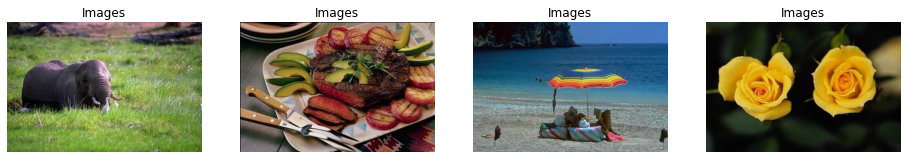

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

benign_dir=os.path.join('/content/model_images/train')



benign_image = os.listdir(benign_dir)


fname1 = [os.path.join(benign_dir,fname)
        for fname in benign_image[:4]]


ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)#
for i,fname in enumerate(fname1):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Images')
    plt.imshow(img)
plt.show()




In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
)

BATCH_SIZE = 16

def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpg":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

In [ ]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join('/content/model_images/train')
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (227,227))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []

vali_dir=os.path.join('/content/model_images/valid')
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (227,227))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (960, 227, 227, 3)
Train Label =  (960,)
Validation Data =  (40, 227, 227, 3)
Validation Label =  (40,)


Arithmetic

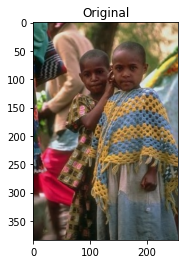

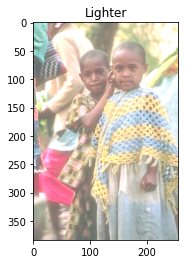

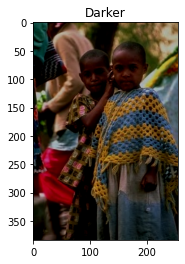

In [ ]:
image = cv2.imread('/content/model_images/train/0.jpg')
plt_imshow("Original", image)

# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

#Darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

Cropping

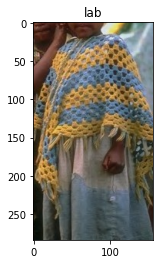

In [ ]:
# cropping an image with OpenCV is accomplished via simple NumPy
# array slices in startY:endY, startX:endX order -- here we are
# cropping the monitor from the image (these coordinates were
# determined using photo editing software such as Photoshop,
# GIMP, Paint, etc.)
# Dimension lab.jpeg = 720x1600
lab = image[100:550, 100:500]
plt_imshow("lab", lab)

Drawing

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
def plt_imshoww(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshoww(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:


# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")



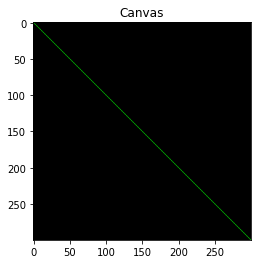

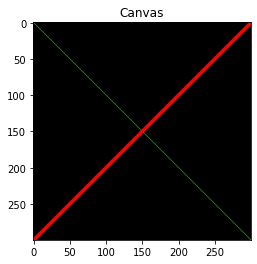

In [ ]:
# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

# draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

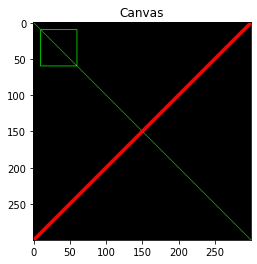

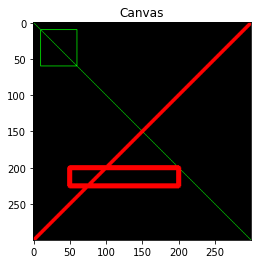

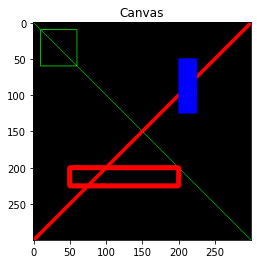

In [ ]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt_imshow("Canvas", canvas)

# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

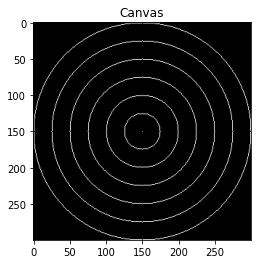

In [ ]:
# re-initialize our canvas as an empty array, then compute the
# center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 150 pixels in 25
# pixel increments
for r in range(0, 175, 25):
	# draw a white circle with the current radius size
	cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

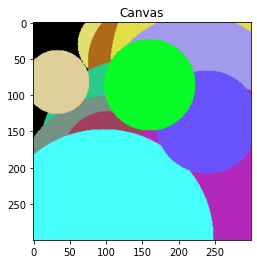

In [ ]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our screen
plt_imshow("Canvas", canvas)

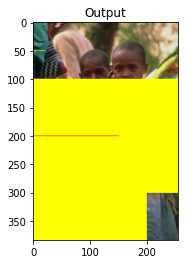

In [ ]:
cv2.rectangle(image, (0, 150), (200, 250), (0, 255, 255), -1)
cv2.rectangle(image, (0, 200), (150, 200), (0, 0, 255), 1)

# show the output image
plt_imshow("Output", image)

Flipping

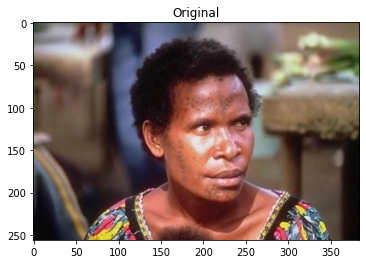

[INFO] flipping image horizontally...


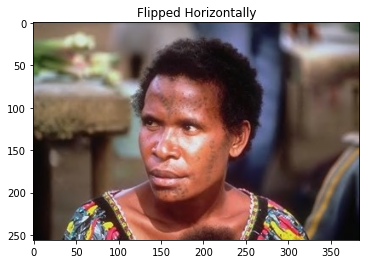

[INFO] flipping image vertically...


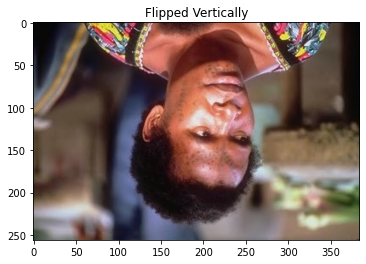

[INFO] flipping image horizontally and vertically...


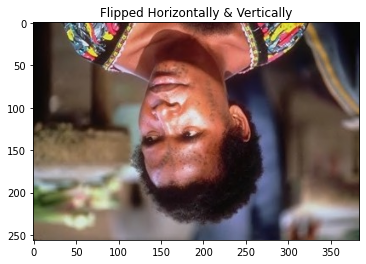

In [ ]:
# load the original input image and display it to our screen
image2 = cv2.imread('/content/model_images/train/1.jpg')
plt_imshow("Original", image2)


# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image2, 1)
plt_imshow("Flipped Horizontally", flipped)

# flip the image vertically
flipped = cv2.flip(image2, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

# flip the image along both axes
flipped = cv2.flip(image2, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

Masking

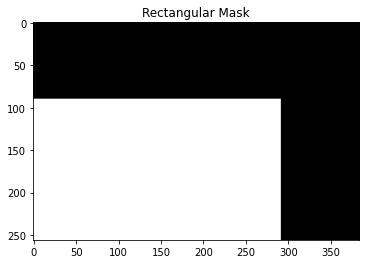

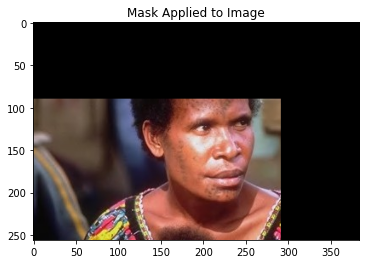

In [ ]:
# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image2.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image2, image2, mask=mask)
plt_imshow("Mask Applied to Image", masked)

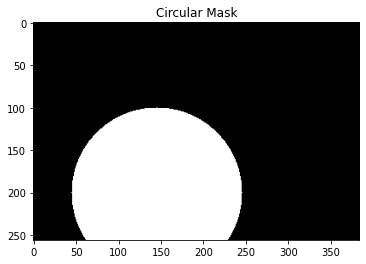

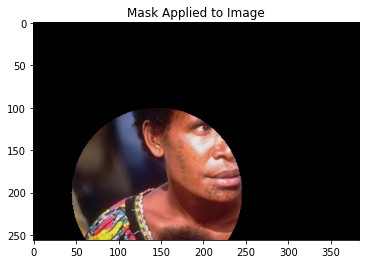

In [ ]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image2.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image2, image2, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

Pixel

In [ ]:
# images are simply NumPy arrays -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image2[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image2[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image2[20, 50] = (0, 0, 255)
(b, g, r) = image2[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 48, Green: 64, Blue: 53
Pixel at (50, 20) - Red: 135, Green: 109, Blue: 108
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


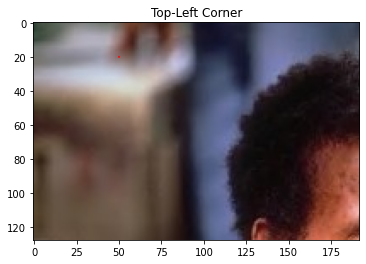

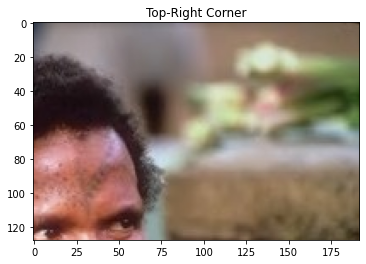

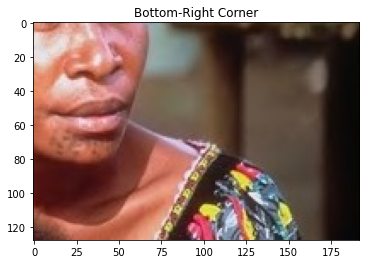

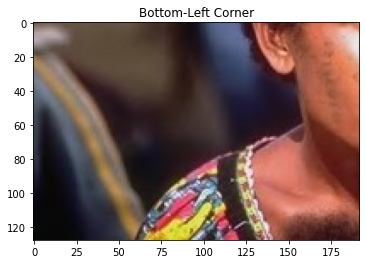

In [ ]:
(h, w) = image2.shape[:2]
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image2[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)



# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image2[0:cY, cX:w]
br = image2[cY:h, cX:w]
bl = image2[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)



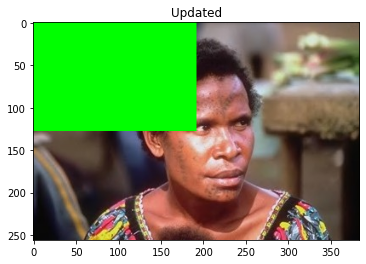

In [ ]:


# set the top-left corner of the original image to be green
image2[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image2)



Read Write IMage

In [ ]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image3 = cv2.imread('/content/model_images/train/3.jpg')
(h, w, c) = image3.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image3.shape[1]))
print("height: {}  pixels".format(image3.shape[0]))
print("channels: {}".format(image3.shape[2]))

width: 256 pixels
height: 384  pixels
channels: 3


Cropping

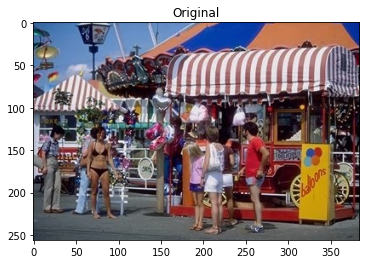

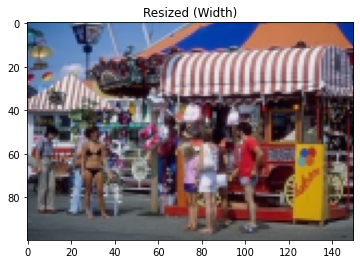

In [116]:
# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image3.shape[1]
dim = (150, int(image3.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image3, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Original", image3)
plt_imshow("Resized (Width)", resized)

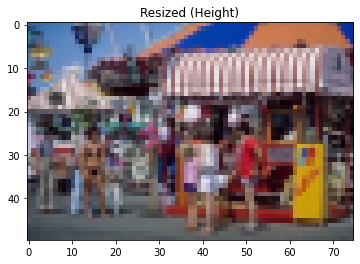

In [117]:


# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image3.shape[0]
dim = (int(image3.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image3, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)



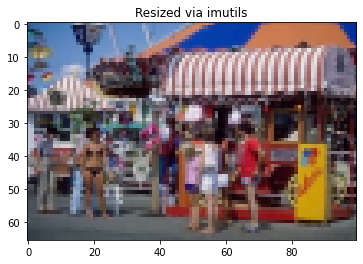

In [119]:
import imutils
# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image3, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


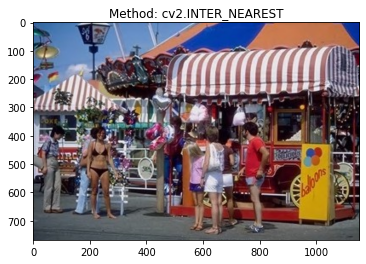

[INFO] cv2.INTER_LINEAR


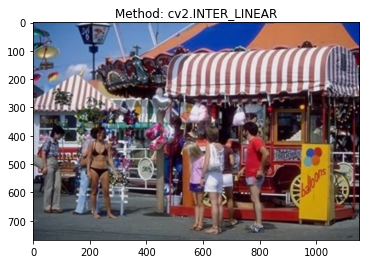

[INFO] cv2.INTER_AREA


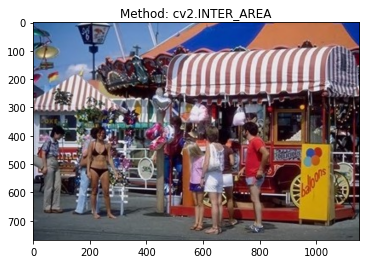

[INFO] cv2.INTER_CUBIC


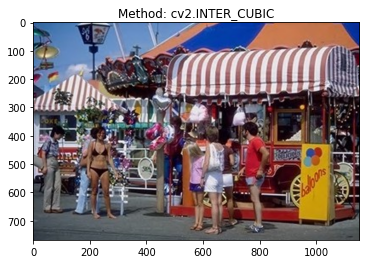

[INFO] cv2.INTER_LANCZOS4


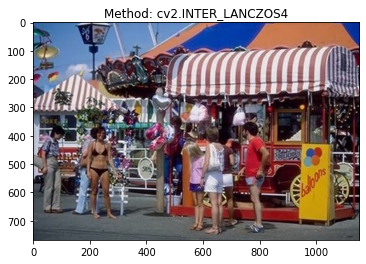

In [120]:
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image3, width=image3.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)

Rotating

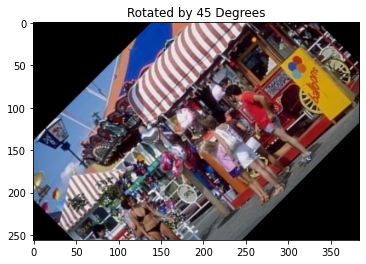

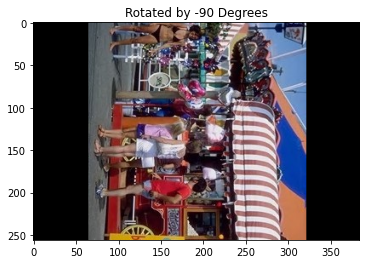

In [122]:
# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image3.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image3, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image3, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

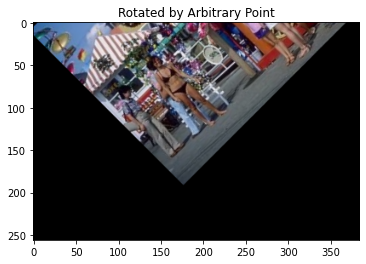

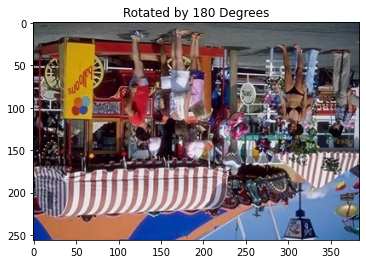

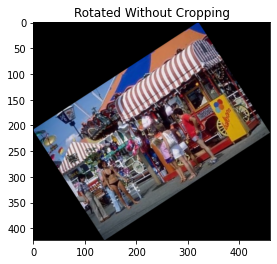

In [123]:
# rotate our image around an arbitrary point rather than the center
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image3, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

# use our imutils function to rotate an image 180 degrees
rotated = imutils.rotate(image3, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

# rotate our image by 33 degrees counterclockwise, ensuring the
# entire rotated image still views in the viewing area
rotated = imutils.rotate_bound(image3, -33)
plt_imshow("Rotated Without Cropping", rotated)

Split Merge

In [124]:
!wget https://riset.informatika.umm.ac.id/aguseko/opencv_logo.png --no-check-certificate

--2021-11-02 10:16:32--  https://riset.informatika.umm.ac.id/aguseko/opencv_logo.png
Resolving riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)... 202.52.52.30
Connecting to riset.informatika.umm.ac.id (riset.informatika.umm.ac.id)|202.52.52.30|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 91541 (89K) [image/png]
Saving to: ‘opencv_logo.png’

opencv_logo.png     100%[===================>]  89.40K   391KB/s    in 0.2s    

2021-11-02 10:16:34 (391 KB/s) - ‘opencv_logo.png’ saved [91541/91541]



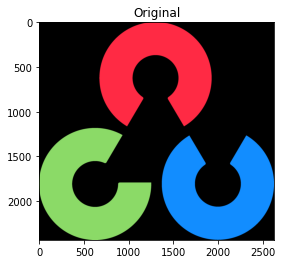

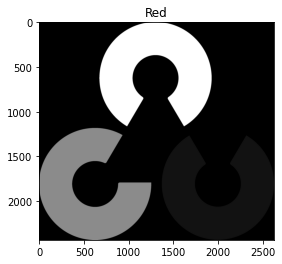

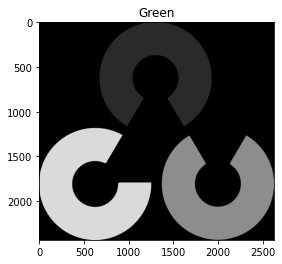

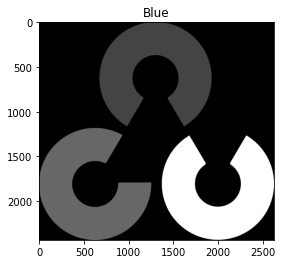

In [126]:
# load the original input image and display it to our screen
image4 = cv2.imread('/content/opencv_logo.png')
plt_imshow("Original", image4)

(B, G, R) = cv2.split(image4)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

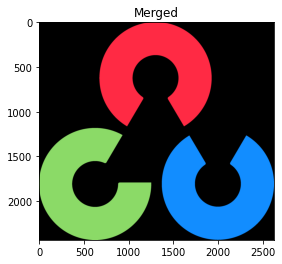

In [127]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

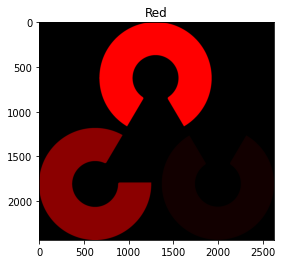

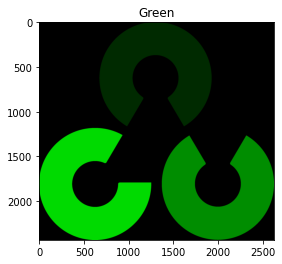

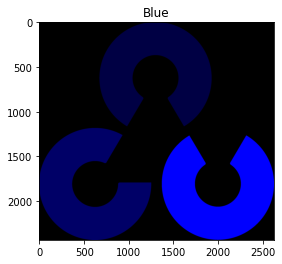

In [130]:
# visualize each channel in color
zeros = np.zeros(image4.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

In [ ]:
Translate

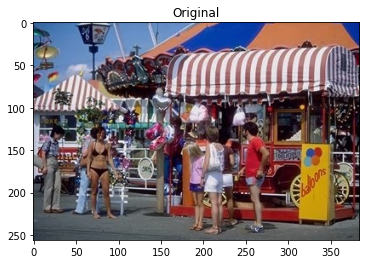

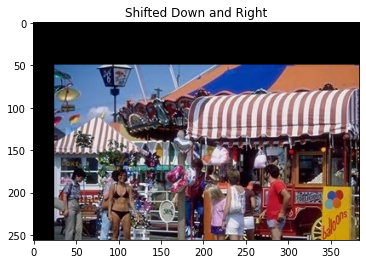

In [131]:
plt_imshow("Original", image3)

# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image3, M, (image3.shape[1], image3.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

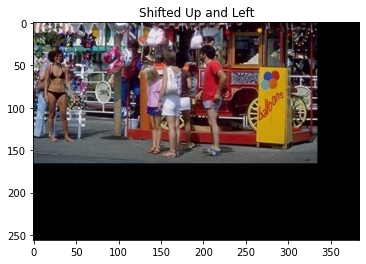

In [132]:
# now, let's shift the image 50 pixels to the left and 90 pixels
# up by specifying negative values for the x and y directions,
# respectively
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image3, M, (image3.shape[1], image3.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

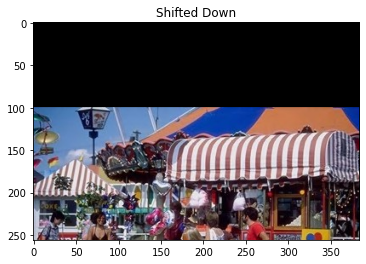

In [133]:


# use the imutils helper function to translate the image 100 pixels
# down in a single function call
shifted = imutils.translate(image3, 0, 100)
plt_imshow("Shifted Down", shifted)

